In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [50]:
src = reload(src)

In [57]:
import pandas
import src
import os

In [58]:
def read_dataframe(kind):
    data = dict()
    for num_topics in [100, 200, 300, 400, 500]:
        projects = src.main.load_projects({"level": "method", "num_topics": num_topics})
        subdata = dict()
        for project in projects:
            ranks = src.main.read_ranks(project, kind)
            with open(os.path.join(project.full_path, 'ids.txt')) as f:
                ids = [x.strip() for x in f.readlines()]
            frms = [x for x,y,z in src.main.get_frms(ranks) if y in ids]
            mrr = src.utils.calculate_mrr(frms)
            subdata[project.printable_name + " "  + project.version] = mrr
        data[num_topics] = subdata
    return pandas.DataFrame(data)

In [59]:
lda = read_dataframe("release_lda")
vec = read_dataframe("release_vec")
vec_sums = read_dataframe("release_vec_sums")

/home/cscorley/git/doc2vec-feature-location/env/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


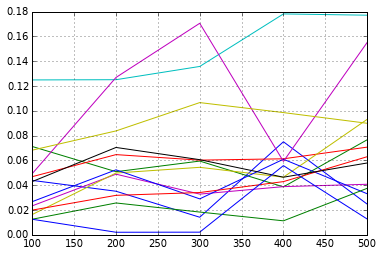

In [60]:
lda.T.plot(legend=False)

In [63]:
lda

,100,200,300,400,500
ArgoUML v0.22,0.043860,0.035133,0.014168,0.075022,0.024786
ArgoUML v0.24,0.071195,0.050886,0.059456,0.038643,0.076617
ArgoUML v0.26.2,0.046896,0.064666,0.060215,0.061285,0.070694
BookKeeper v4.3.0,0.124895,0.125084,0.135764,0.178123,0.177104
Derby v10.11.1.1,0.023385,0.048883,0.032820,0.038844,0.040750
JabRef v2.6,0.016394,0.049834,0.054416,0.046470,0.093094
Lucene v4.10.1,NaN,NaN,NaN,NaN,NaN
Mahout v0.10.0,0.026765,0.052407,0.028974,0.060946,0.033123
OpenJPA v2.3.0,0.012572,0.025668,0.018347,0.011276,0.037475
Pig v0.14.0,0.019922,0.031825,0.034082,0.042896,0.062963


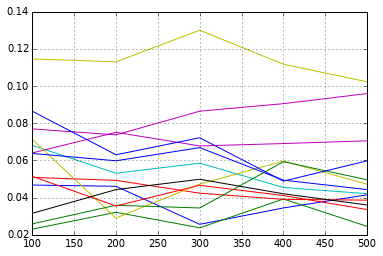

In [61]:
vec.T.plot(legend=False)

In [64]:
vec

,100,200,300,400,500
ArgoUML v0.22,0.046743,0.046079,0.025626,0.034438,0.041514
ArgoUML v0.24,0.023068,0.032096,0.023761,0.039249,0.024535
ArgoUML v0.26.2,0.050869,0.049265,0.042376,0.039049,0.038626
BookKeeper v4.3.0,0.068065,0.053083,0.058525,0.045433,0.042116
Derby v10.11.1.1,0.064017,0.075095,0.067775,0.069055,0.070532
JabRef v2.6,0.071248,0.029003,0.047259,0.059649,0.047187
Lucene v4.10.1,NaN,NaN,NaN,NaN,NaN
Mahout v0.10.0,0.063743,0.059797,0.066866,0.049382,0.044298
OpenJPA v2.3.0,0.025875,0.035881,0.034418,0.059295,0.049583
Pig v0.14.0,0.051424,0.035480,0.046628,0.041099,0.033560


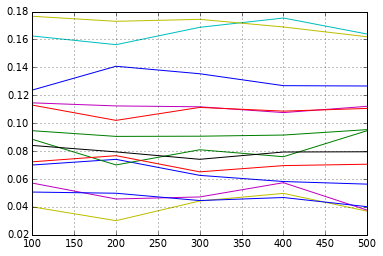

In [62]:
vec_sums.T.plot(legend=False)

In [65]:
vec_sums

,100,200,300,400,500
ArgoUML v0.22,0.070025,0.074087,0.062610,0.058189,0.056322
ArgoUML v0.24,0.088447,0.070070,0.080960,0.075977,0.094617
ArgoUML v0.26.2,0.072332,0.076723,0.065133,0.069604,0.070597
BookKeeper v4.3.0,0.162514,0.156301,0.168728,0.175404,0.163919
Derby v10.11.1.1,0.114588,0.112382,0.111765,0.107611,0.112093
JabRef v2.6,0.040022,0.030126,0.044236,0.049687,0.036935
Lucene v4.10.1,NaN,NaN,NaN,NaN,NaN
Mahout v0.10.0,0.123764,0.140825,0.135458,0.126907,0.126668
OpenJPA v2.3.0,0.094621,0.090538,0.090678,0.091503,0.095392
Pig v0.14.0,0.112975,0.102020,0.111323,0.108656,0.110597
